## Final Project Submission

Please fill out:

- Students name: Derrick Wekesa
- Student pace: full time
- Scheduled project review date/time:
- Instructor name:
- Blog post URL:


In [72]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import folium
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [52]:

#loading the dataset
kc_data = pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


DATA PREPARATION

In [53]:
#getting last five columns of the dataset
kc_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
#Getting the number of rows and columns in the dataset
print('Data frame rows and columns :',kc_data.shape)

Data frame rows and columns : (21597, 21)


DATA ANALYSIS

In [54]:
#Getting statistics about the data

print("Stats about the data :", kc_data.describe())

Stats about the data :                  id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.5

In [55]:
#finding duplicates

def check_duplicates(data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates(kc_data)

0

In [12]:
unique_cols = []
for col in kc_data.columns:
    if kc_data[col].nunique() == 1:
        unique_cols.append(col)
print(unique_cols)

[]


In [56]:

unique_columns = kc_data['id'].unique()
print(unique_columns)

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


In [58]:
#getting unique columns in the dataset
def find_unique_columns(kc_data):
    df = pd.read_csv(kc_data)
    unique_columns = []
    for col in df.columns:
        if df[col].nunique() == len(df):
            unique_columns.append(col)
    return unique_columns

In [57]:
#mapping categorical values
kc_data['id'] = pd.factorize(kc_data['id'])[0]

kc_data['waterfront'] = pd.factorize(kc_data['waterfront'])[0]

kc_data['view'] = pd.factorize(kc_data['view'])[0]

kc_data['condition'] = pd.factorize(kc_data['condition'])[0]

kc_data['grade'] = pd.factorize(kc_data['grade'])[0]

kc_data['sqft_basenment'] = pd.factorize(kc_data['sqft_basement'])[0]

#print updated dataframe
print(kc_data)

          id        date     price  bedrooms  bathrooms  sqft_living  \
0          0  10/13/2014  221900.0         3       1.00         1180   
1          1   12/9/2014  538000.0         3       2.25         2570   
2          2   2/25/2015  180000.0         2       1.00          770   
3          3   12/9/2014  604000.0         4       3.00         1960   
4          4   2/18/2015  510000.0         3       2.00         1680   
...      ...         ...       ...       ...        ...          ...   
21592  21415   5/21/2014  360000.0         3       2.50         1530   
21593  21416   2/23/2015  400000.0         4       2.50         2310   
21594  21417   6/23/2014  402101.0         2       0.75         1020   
21595  21418   1/16/2015  400000.0         3       2.50         1600   
21596  21419  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          5650     1.0          -1     0  ...        1180

In [59]:
#Finding the data types of the variables

print("Data types of the variables :",kc_data.dtypes)

Data types of the variables : id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement      object
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
sqft_basenment      int64
dtype: object


In [60]:

#finding missing values

def missing_values(df):
    """
    This function takes a pandas dataframe as input and returns the number of missing values in each column.
    """
    return df.isnull().sum()

print(missing_values(kc_data))

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated      3842
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
sqft_basenment       0
dtype: int64


In [61]:
# Handling missing values
# Drop rows with any missing values

def drop_missing_values(df):
    """
    This function takes a pandas dataframe as input and returns the dataframe with rows containing missing values removed.
    """
    return df.dropna(inplace=False)

df1 = drop_missing_values(kc_data)



In [62]:
def drop_columns(df, column_names):
    new_df = df.drop(column_names, axis=1)
    return new_df

In [63]:
# Finding the target variable

y_target = df1['price']

#print('Target variable :',y_target.head())

y_target.head()

0     221900.0
1     538000.0
3     604000.0
4     510000.0
5    1230000.0
Name: price, dtype: float64

In [26]:
#finding the columns
kc_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basenment'],
      dtype='object')

In [64]:
df = kc_data.dropna()
df = df[(df['price'] >= 100000) & (df['price'] <= 5000000)]

 Distribution of individual columns

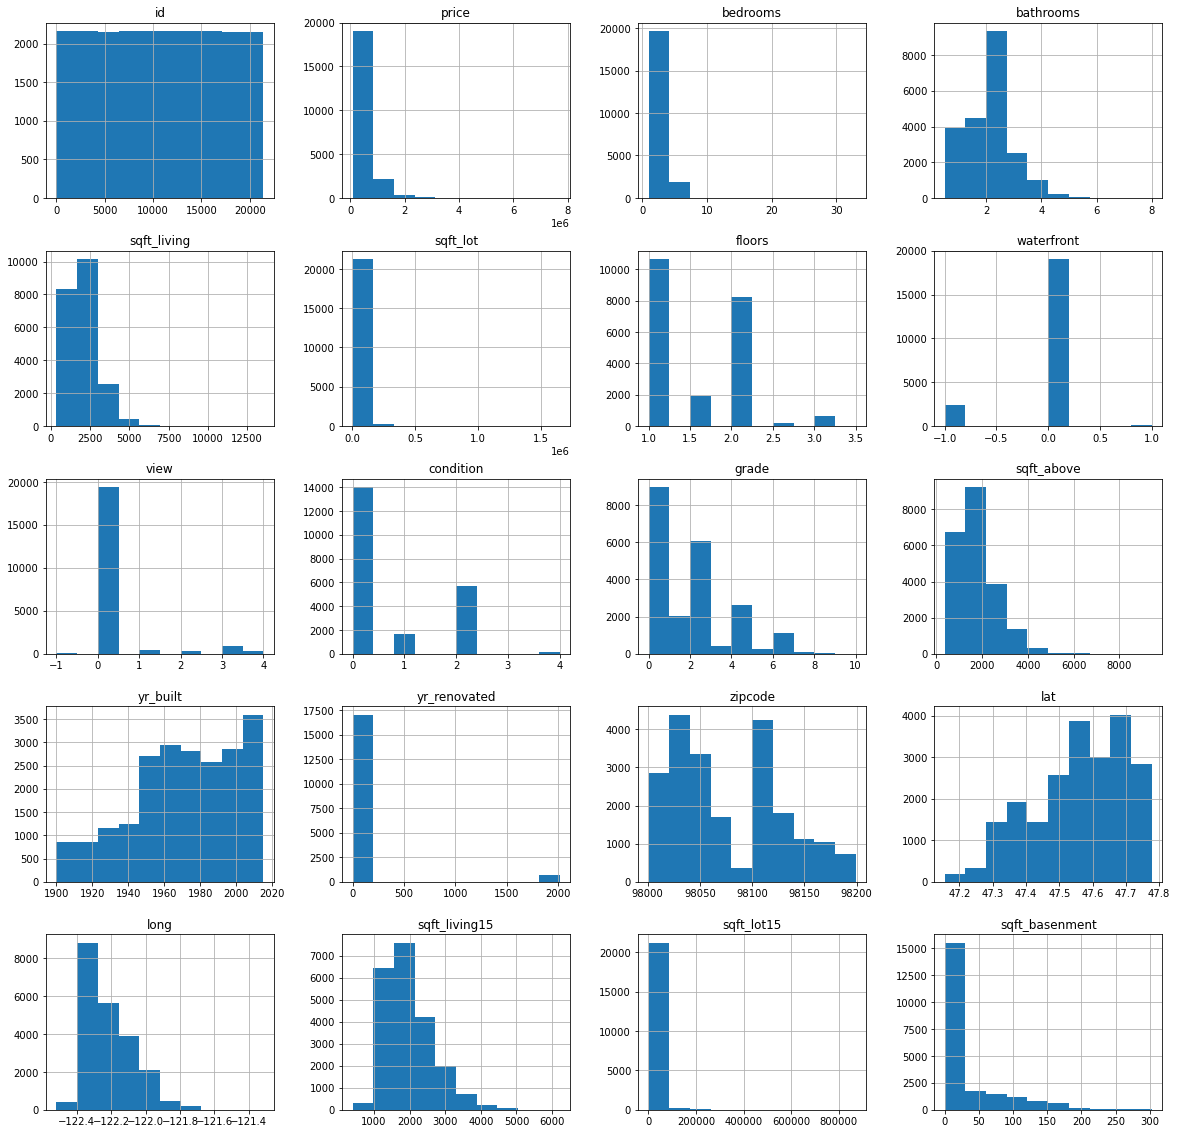

In [65]:
kc_data.hist(figsize=(20,20));

### Bivariate EDA

- Checking for the relationship between variables.
- Our bivariate EDA involves checking for relationship between various features and the price

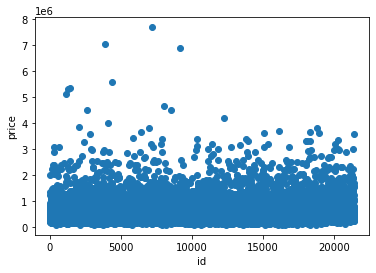

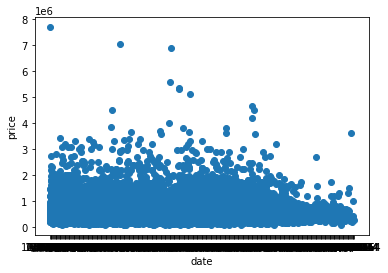

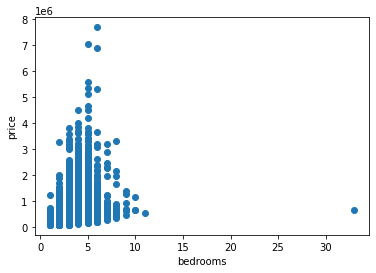

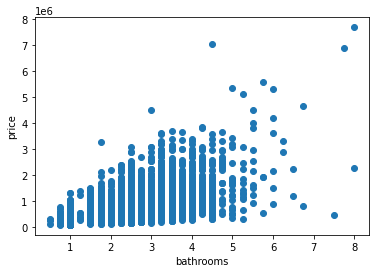

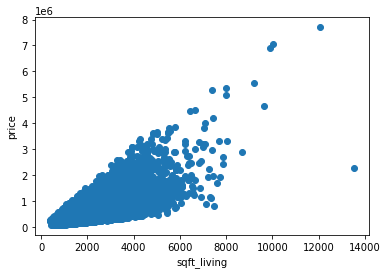

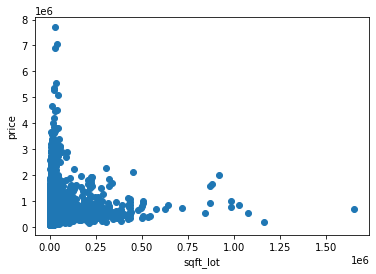

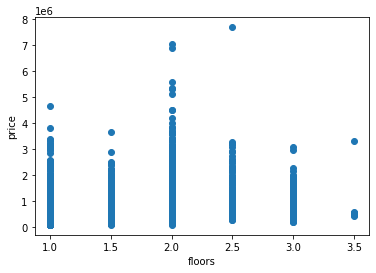

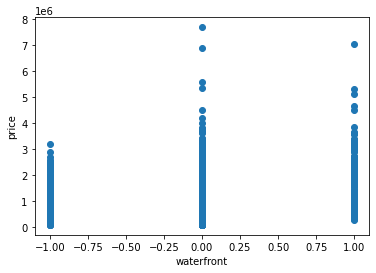

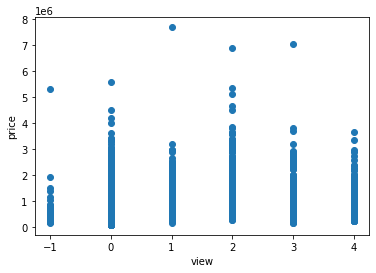

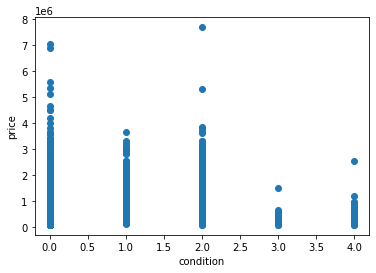

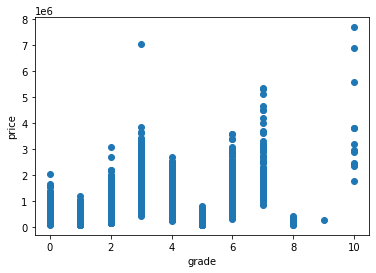

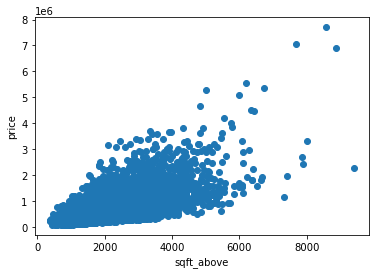

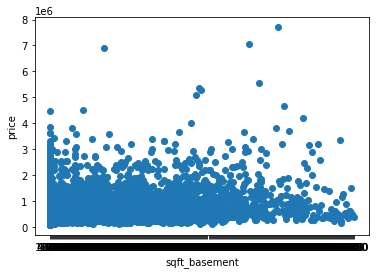

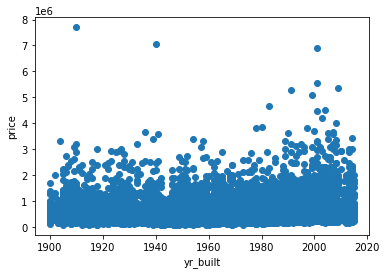

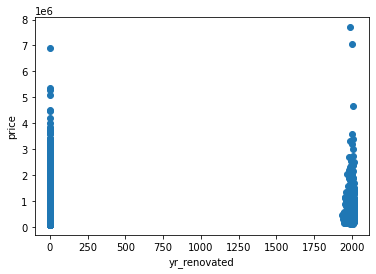

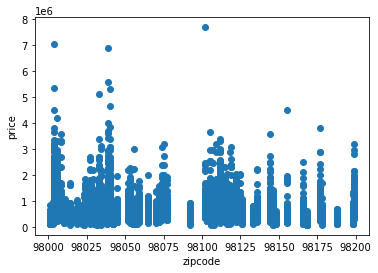

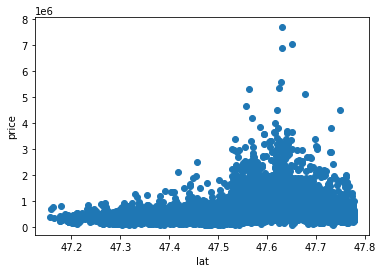

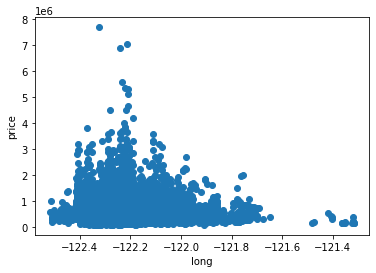

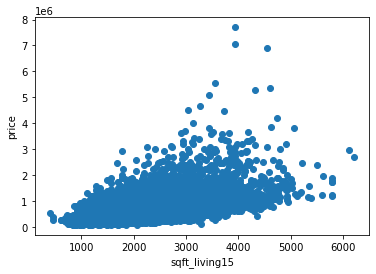

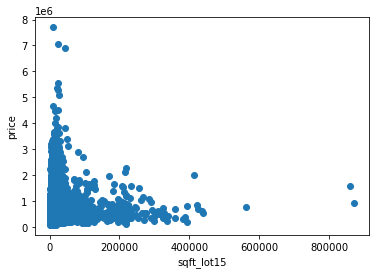

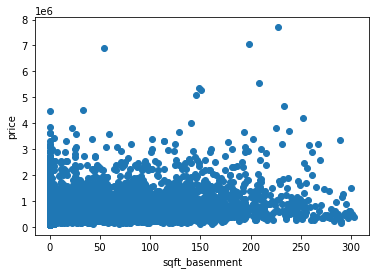

In [66]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

From the above visualizations we can see that the following features have the most linear relationship with price 
* sqft_living
* sqft_above
* sqft_living15
* sqft_basement


## Multivariete EDA

- I  used eatures with the most linear relationship to the price and then visualize them together

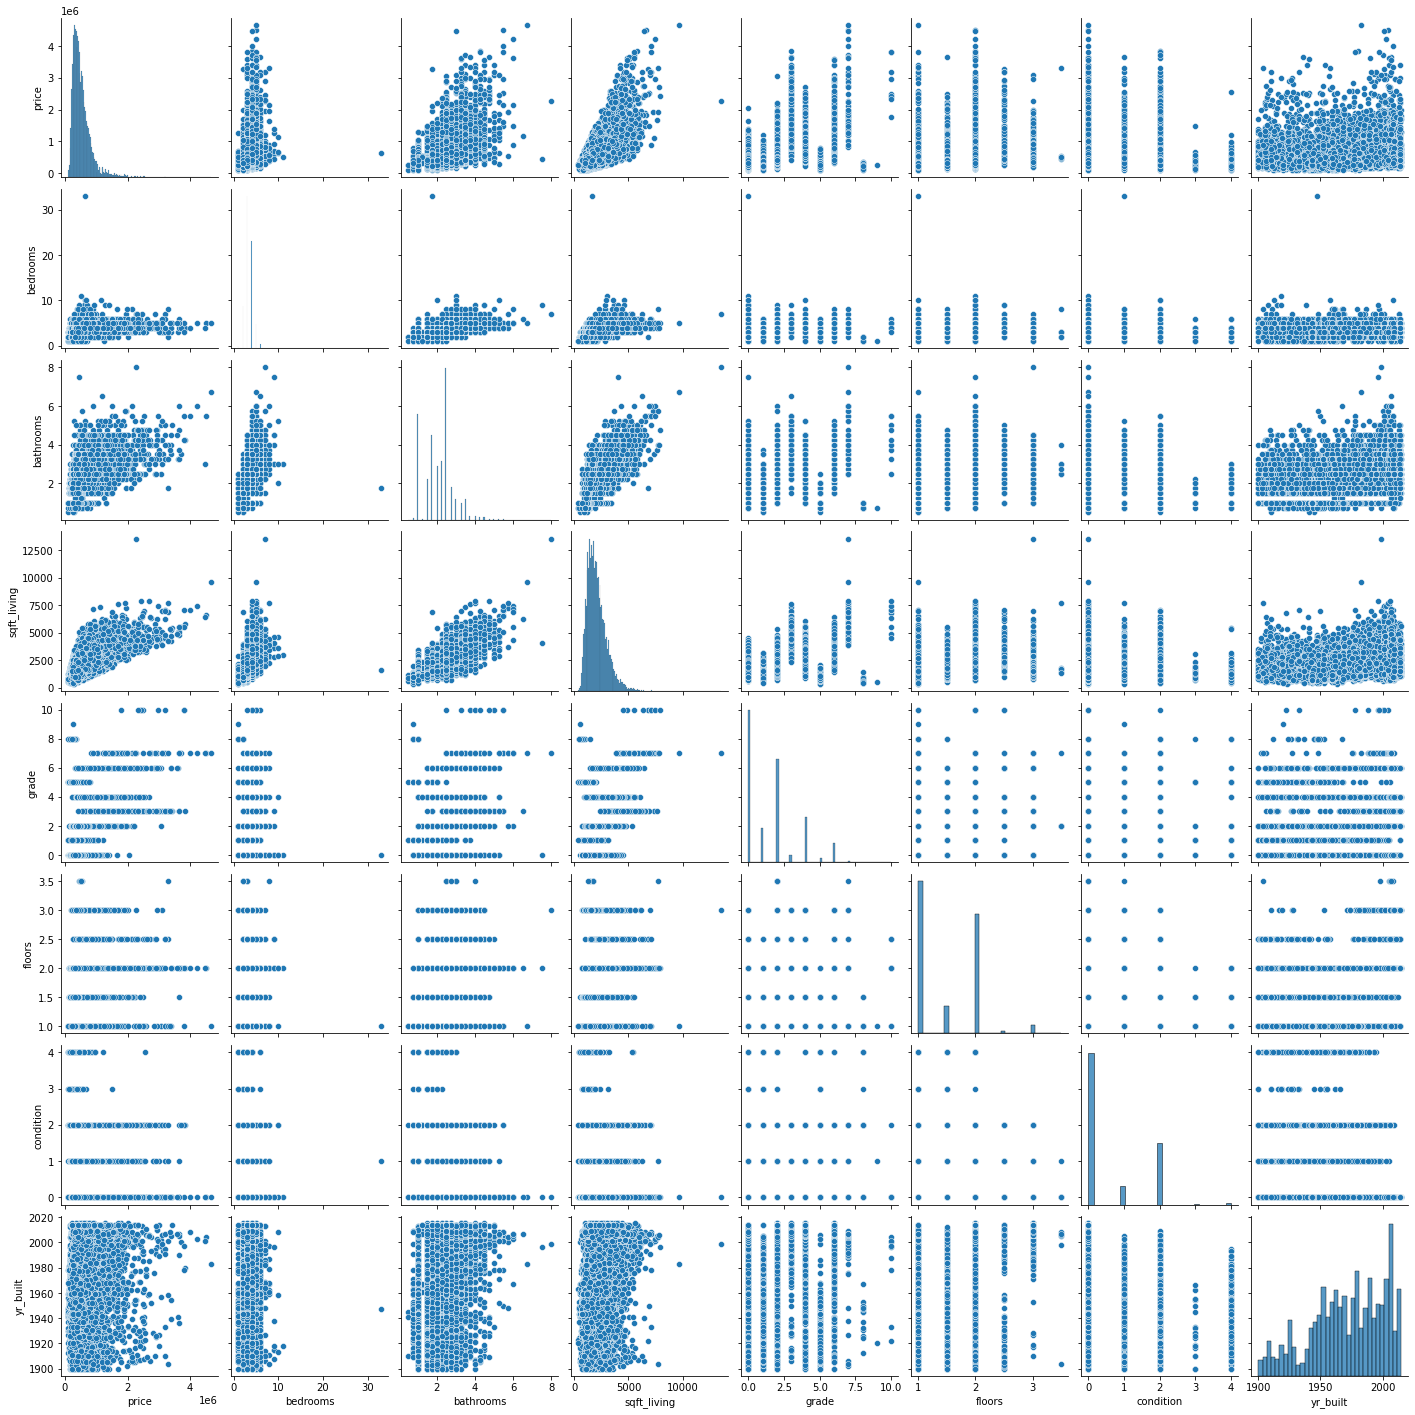

In [67]:
#select variables of interest
vars_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade',  'floors', 'condition', 'yr_built']

# create pairplot
sns.pairplot(df[vars_of_interest])

## Feature Engineering

In [68]:
# create a new feature based on the year of construction
df['age'] = 2023 - df['yr_built']

- New feature called 'age' is created based on the 'yr_built' feature. This new feature represents the age of each house in years, which may be more informative for the model than the original 'yr_built' feature.

#### Creating a new column named Age

## Correlation

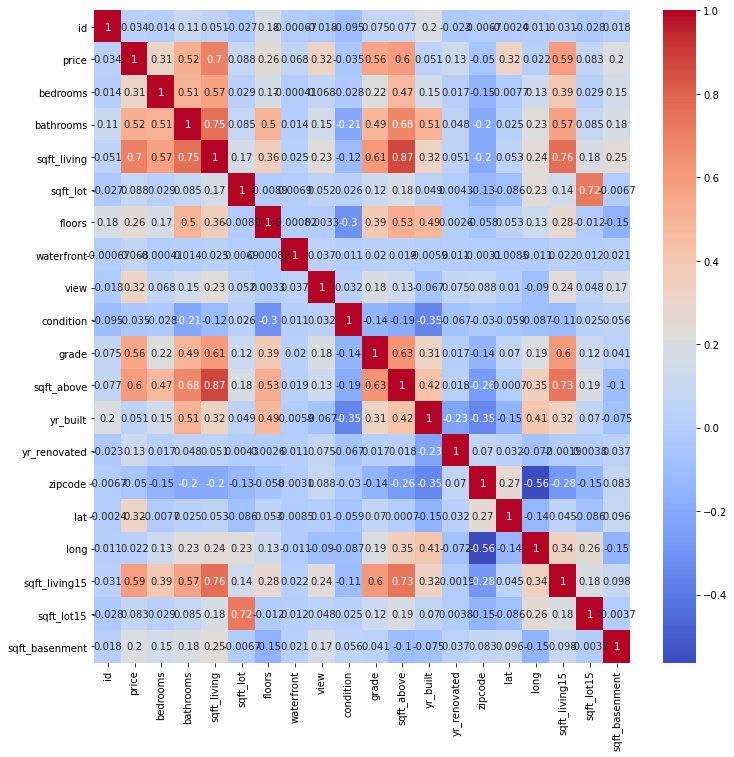

In [34]:
#heatmap to visualize the correlation between the features and the target variable:

corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()


- we can see that bedrooms, bathrooms, sqft_living, floors, condition, grade, and yr_built have a relatively high correlation with price, so we will include these features in our model.

## Multicollinearity

<AxesSubplot:>

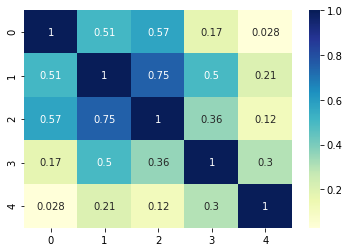

In [69]:
# select predictor variables
predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition']

# calculate correlation matrix
corr_matrix = np.abs(np.corrcoef(df[predictors].T))

# create heatmap of correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [70]:
#removing highly correlated variables
predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'condition']
X = df[predictors]
y = df['price']
model = LinearRegression().fit(X, y)

## One hot encoding

-  converting categorical variables into numerical variables that can be used in regression models

In [71]:
# select categorical features
cat_features = ['waterfront', 'view']

# perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_features)

# Linear regression



- I used r-squared as the measure of metrics because;
- it proportion of variance in the target variable that can be explained by the predictor variables 
- It provides a clear indication of the goodness of fit of the model. It also has the advantage of being easy to interpret and communicate to non-technical stakeholders.


- Baseline model

In [74]:
# Set the predictor and target variables
X = df.drop('price', axis=1)
y = df['price']

y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the baseline model
baseline_model = LinearRegression()

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Baseline Model:')
print('R-squared: {:.2f}'.format(r2))
print('RMSE: {:.2f}'.format(rmse))


NameError: name 'train_test_split' is not defined